# Deep Learning: Endoscopy segmentation.
[Dataset](https://www.kaggle.com/datasets/newslab/cholecseg8k?resource=download)
## Data overview.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from glob import glob

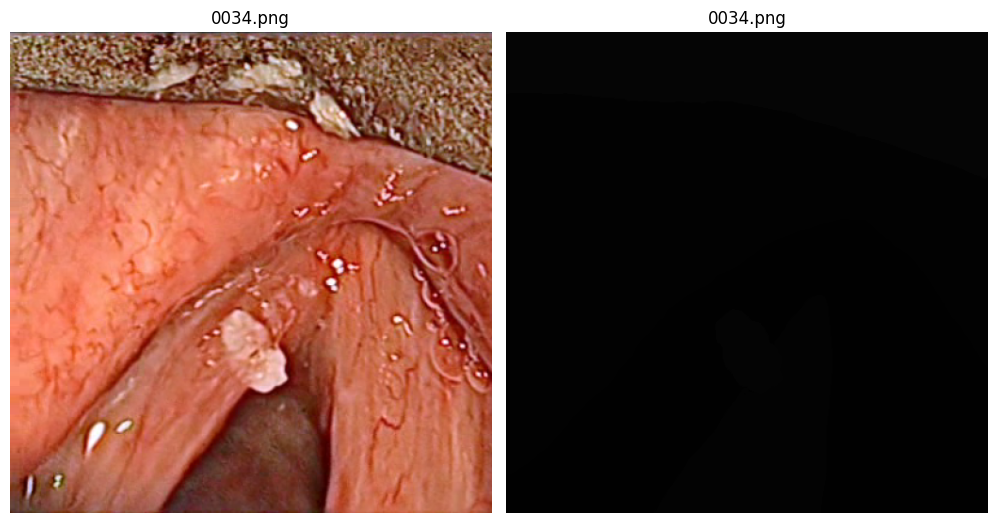

In [11]:
imgs = []
imgIdx = random.randint(0, 159)
paths = glob(f'../../vocalfolds/img/*/*/0034.png') + glob(f'../../vocalfolds/annot/*/*/0034.png') 

for sample in paths:
    img = cv2.imread(sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
imgs = np.array(imgs)

plt.figure(figsize=(20,20))
for i in range(imgs.shape[0]):
  plt.subplot(121 + i)
  plt.imshow(imgs[i])
  plt.title(paths[i].split('\\')[-1])
  plt.axis("off")
plt.tight_layout()
plt.show()

### Analyze the masks

In [13]:
imgs.shape

(2, 512, 512, 3)

In [14]:
print('Unique values')
print(f'Color mask: {len(np.unique(imgs[1].reshape(-1, 3), axis=0))}')

print('Values')
print(f'Color mask: {np.unique(imgs[1].reshape(-1, 3), axis=0)}')


Unique values
Color mask: 6
Values
Color mask: [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]]


## Mask Processing

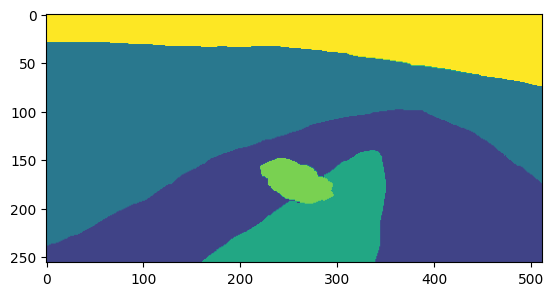

In [15]:
HEIGHT, WIDTH = 256, 512
mask = glob(f'../../vocalfolds/annot/*/*/0034.png')[0]

mask = cv2.imread(mask)
mask = mask[10:-10, 10:-10,:]
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.resize(mask, (WIDTH, HEIGHT), interpolation=cv2.INTER_NEAREST)
mask = np.expand_dims(mask, axis=-1)

plt.imshow(mask)
plt.show()

In [16]:
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

 --- 
 TFG - Alejandro García Mota